<a href="https://colab.research.google.com/github/Ghada-Bel/TP-ML/blob/main/MLTP_3_R%C3%A9gression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving DataTP3-Regression.csv to DataTP3-Regression.csv


In [2]:
import pandas as pd

df = pd.read_csv('DataTP3-Regression.csv')


In [3]:
print(df.head())          # Affiche les 5 premières lignes
print(df.info())          # Infos générales (types, nulls)
print(df.describe())      # Statistiques descriptives


   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000

In [4]:
print(df.isnull().sum())  # Nombre de valeurs manquantes par colonne


R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [5]:
df = pd.get_dummies(df, columns=['State'], drop_first=True)


In [6]:
X = df.drop('Profit', axis=1)  # Features
y = df['Profit']               # Target


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
print(df.cov())


                    R&D Spend  Administration  Marketing Spend        Profit  \
R&D Spend        2.107017e+09    3.111739e+08     4.065495e+09  1.800007e+09   
Administration   3.111739e+08    7.849973e+08    -1.101690e+08  2.266673e+08   
Marketing Spend  4.065495e+09   -1.101690e+08     1.495492e+10  3.685779e+09   
Profit           1.800007e+09    2.266673e+08     3.685779e+09  1.624588e+09   
State_Florida    2.286498e+03    1.385332e+02     1.185256e+04  2.207799e+03   
State_New York   8.581346e+02    6.898218e+01    -1.970294e+03  6.049944e+02   

                 State_Florida  State_New York  
R&D Spend          2286.498171      858.134588  
Administration      138.533192       68.982180  
Marketing Spend   11852.556229    -1970.293727  
Profit             2207.799241      604.994359  
State_Florida         0.222041       -0.111020  
State_New York       -0.111020        0.228980  


In [9]:
print(df.corr())


                 R&D Spend  Administration  Marketing Spend    Profit  \
R&D Spend         1.000000        0.241955         0.724248  0.972900   
Administration    0.241955        1.000000        -0.032154  0.200717   
Marketing Spend   0.724248       -0.032154         1.000000  0.747766   
Profit            0.972900        0.200717         0.747766  1.000000   
State_Florida     0.105711        0.010493         0.205685  0.116244   
State_New York    0.039068        0.005145        -0.033670  0.031368   

                 State_Florida  State_New York  
R&D Spend             0.105711        0.039068  
Administration        0.010493        0.005145  
Marketing Spend       0.205685       -0.033670  
Profit                0.116244        0.031368  
State_Florida         1.000000       -0.492366  
State_New York       -0.492366        1.000000  


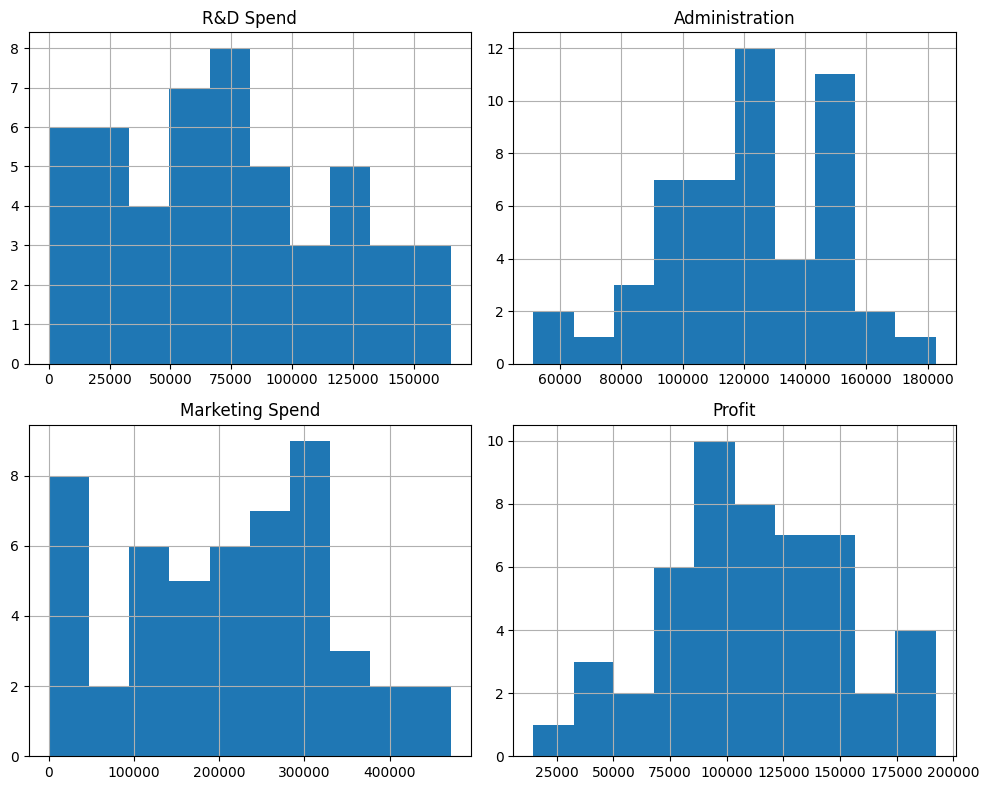

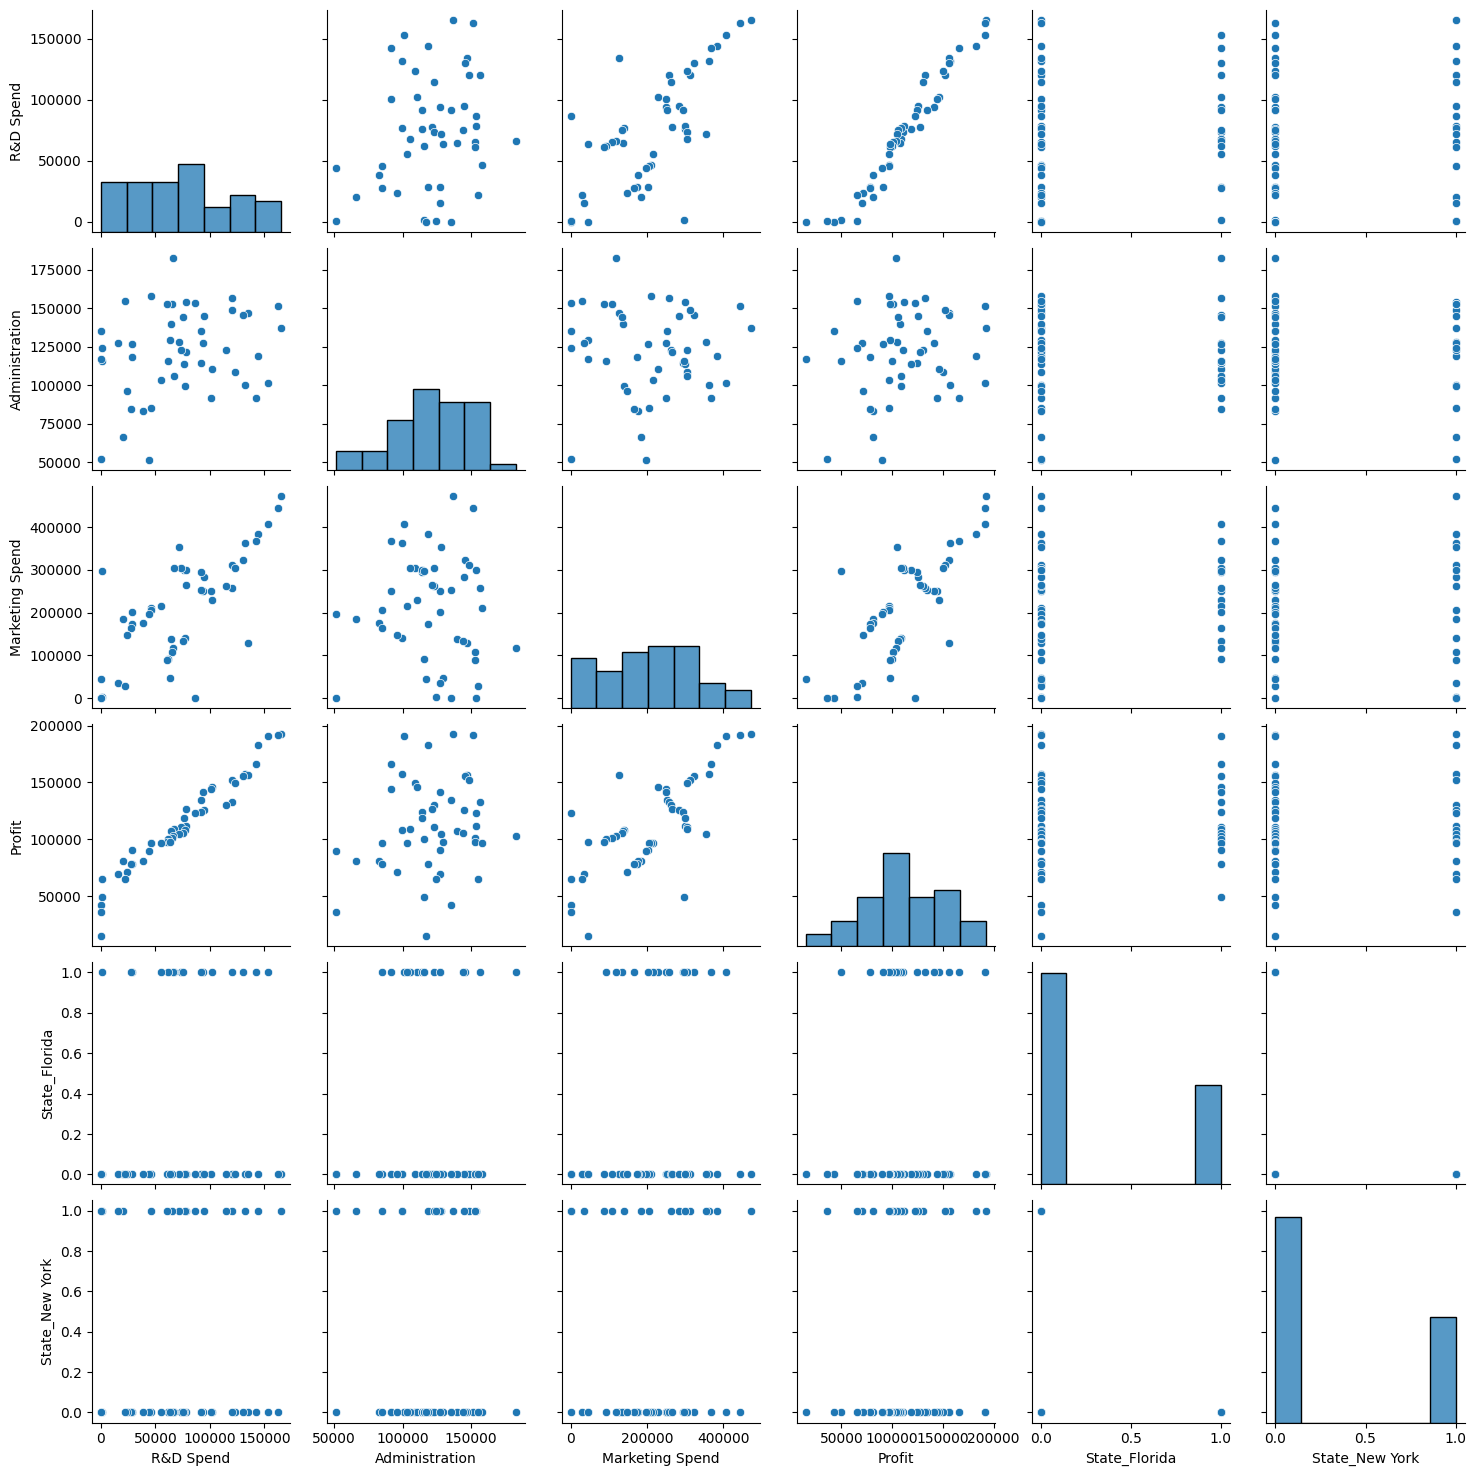

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

sns.pairplot(df)
plt.show()


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [12]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)


                 Coefficient
R&D Spend           0.805630
Administration     -0.068788
Marketing Spend     0.029855
State_Florida     938.793006
State_New York      6.987760


In [14]:
print("R² Score:", r2_score(y_test, y_pred))
# Calculate RMSE without the 'squared' argument, then take the square root
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("RMSE:", rmse)


R² Score: 0.8987266414328637
RMSE: 9055.957323458464
